YOUR NAME HERE: Cody Turpin

# Homework 4: Line  Graphs and Scatter Graphs

Covers material from Ch 6/7 in the text

## All visuals must have axes labels and a title, whether the directions state it or not.  Labels should reflect the units where needed as well.

Make sure that the text on the axes labels are present, grammatically correct, capitalized accurately, and make sense.

In [2]:
#Please import the 3 packages you need for working with tables and data frames here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Please write the line that lets you use the 538 style below.

---
## A. Old Faithful

It is said that the famous Old Faithful hot water geyser in Yellowstone National park erupts every 44 to 125 minutes (according to [Wikipedia](https://en.wikipedia.org/wiki/Old_Faithful)). People are [often told that the geyser erupts every hour](http://yellowstone.net/geysers/old-faithful/), but that's based on today's data.

In this section, we'll consider a classic data set giving recorded times between consecutive eruptions. An interesting problem is to attempt to predict the time of the next eruption. This data is 20 or so years old, but Old Faithful's habits don't change much. 

Each row in the "geyser.csv" file represents an observed eruption of the Old Faithful Geyser in Yellowstone National Park. 
* The eruptions column represents the duration of the eruption in **minutes**, and 
* the waiting column represents the duration in **minutes** since the prior eruption.  

For example the first eruption lasted 3.6 minutes and occurred 79 minutes after the previous eruption.

This data was original published [here](https://bl.ocks.org/) but the primary source is here: Härdle, W. (1991) Smoothing Techniques with Implementation in S. New York: Springer.

In [3]:
geyser = pd.read_csv("geyser.csv")
geyser

,duration,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


---

### **Question 1.** 

Create a scatter plot to show the relationship between the duration of an eruption and how much time passes till the next eruption.  Place the Duration on the x axis.

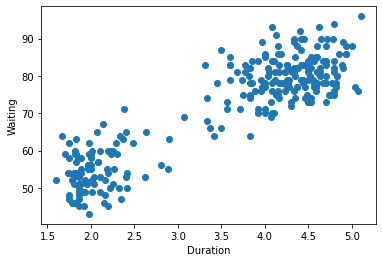

In [4]:
#Scatter Plot Code here
plt.scatter(geyser['duration'], geyser['waiting'])
plt.xlabel('Duration')
plt.ylabel('Waiting');

---

### **Question 2.** 

A)  Assign values to `shortest`, `longest`, and `average` so that the `print` statement is correct.

In [5]:
shortest = geyser['waiting'].min()
longest = geyser['waiting'].max()
average = geyser['waiting'].mean()

print("Old Faithful erupts every", shortest, "to", longest, "minutes and every", average, "minutes on average.")

Old Faithful erupts every 43 to 96 minutes and every 70.8970588235294 minutes on average.


B) Compare the 20 year old data to today's data. (Remember: Wikipedia tells us currently the geyser erupts every 44 to 125 minutes.)  What appears to be different?

The data 20 years ago has the range from 43 to 96 minutes, whereas today it's from 44 to 125 minutes, meaning that the geyser erupts less frequently today than it did 20 years ago.

---

### **Question 3.** 

A) Find the correlation coefficient between the 2 variables in our dataset.

In [6]:
geyser.corr()

,duration,waiting
duration,1.000000,0.900811
waiting,0.900811,1.000000


B) Write a sentence interpreting what we learn from the correlation coefficient.  (Hint:  What do we now know about the relationship between these variablbles?) 

<span style="color:red">*There is a strong positive correlation between the duration of the geyser and how long between each geyser eruption.*</span>



C) Why does the correlation coefficient make sense in the context of this data set?  (In other words, in terms of geyers, *why* would you expect to the correlation coefficient to be +/-, whatever you observed?)

<span style="color:red">*This is to be expected because the longer the time there is between eruptions the more pressure there is building up in the volcano and therefore the longer the eruption will last.*</span>

---

Look at that scatter plot again!  There are clearly 2 distinct groupings of points, one in the lower left (the ones where the euprtion time are short) and one in the upper right (the ones where the euprtion times are long).  

Let's divide the points into the short eruptions (<= 3 minutes) and the long eruptions (above 3 minutes) and show our scatter plot as such.

<img src="https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/geyser_short_long.png">

---



### **Question 4.**  

A) Create 2 dataframes: one with all the rows for the short eruptions and one with the long eruptions.

In [7]:
#Set the dataframes below accordingly
short_eruptions = geyser['duration'] < 3
short_eruptions = geyser[short_eruptions]
long_eruptions = geyser['duration'] > 3
long_eruptions = geyser[long_eruptions]

#Sanity Check - First 2 should add to last
len(short_eruptions), len(long_eruptions), len(geyser)

(97, 175, 272)

B) Verify that the average duration of the short eruptions is about 2 min and the average of the long eruptions is about 4.3 min

In [8]:
short_mean_duration = short_eruptions['duration'].mean()
long_mean_duration = long_eruptions['duration'].mean()

short_mean_duration, long_mean_duration

(2.0381340206185565, 4.291302857142858)

C) Create the scatter plot above where the short_eruptions are blue and the long_eruptions show in orange.

To make the plot, you'll need this info.

 * A parameter of ```color = "orange"``` can be used with plt.scatter to change the color of the dots.
 * To place legends on a chart, we include a  ``label`` when calling ``plt.scatter`` (see example code below) and then we add ```plt.legend()``` to the end of the cell.
     * ```plt.scatter(table['X_col'], table['Y_col'], label="Whatever I want the label to be")```
 * To move the legend around the box, add the ``loc`` parameter to the ``plt.legend`` function with one of these values. <br/>For example, ```loc=`upper center` ``` or  ```loc=9``` could be used to position the legend in different locations on the plot.
 
 | Location String | Location Code |
|:---------------:|:-------------:|
|      'best'     |       0       |
|  'upper right'  |       1       |
|   'upper left'  |       2       |
|   'lower left'  |       3       |
|  'lower right'  |       4       |
|     'right'     |       5       |
|  'center left'  |       6       |
|  'center right' |       7       |
|  'lower center' |       8       |
|  'upper center' |       9       |
|     'center'    |       10      |

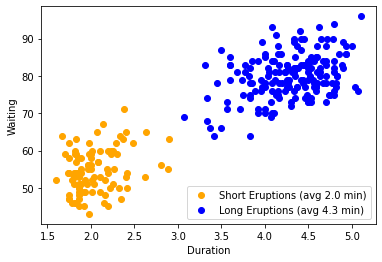

In [9]:
#Your scatter plot code here.
plt.scatter(short_eruptions['duration'], short_eruptions['waiting'], label='Short Eruptions (avg 2.0 min)', color = 'orange')
plt.scatter(long_eruptions['duration'], long_eruptions['waiting'], label='Long Eruptions (avg 4.3 min)', color = 'blue')
plt.xlabel('Duration')
plt.ylabel('Waiting')
plt.legend(loc='lower right');


---

### EMPIRICAL GUIDELINES - A REMINDER

Below are 2 histograms that allows us to compare how much time passed before a short eruption and how much time passed before a long eruption.

![C-3PO](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/DurationHist.png)


Notice that for both distributions, the waiting times are relatively ``normal``, ie, bell-shaped and symmetric.

Also, recall that you learned about standard deviation (SD) in class and how we can use SD to estimate typical/atypical values.

Specifically, we discussed these guidelines (called the **Empirical Guidelines**) regarding approximately normal distributions.

* Roughly 95\% of data points fall within 2SDs of the mean, ie, within the interval below. We usually consider this interval to be the range ``typical values`` for the data set, and the 5% of remaining values are consider unusual/extreme.

$$(mean - 2*SD, mean + 2*SD)$$, 

* Whereas the above interval are the typical values, almost ALL points (including both typical/atypical values) fall in this interval.

$$(mean - 3*SD, mean + 3*SD)$$, 

We will use these facts in the next section.

---

### **Question 5.**  

A)  Find the mean and standard deviation for the wait times of the short duration geyser eruptions using the ``describe`` function.

In [10]:
#Put the code for the describe function here and store the returned table in short_eruptions_stats.
short_eruptions.describe()

,duration,waiting
count,97.000000,97.000000
mean,2.038134,54.494845
std,0.266865,5.840098
min,1.600000,43.000000
25%,1.833000,50.000000
50%,1.983000,54.000000
75%,2.200000,59.000000
max,2.900000,71.000000


<br/><br/>

B) Now find the lower and upper bounds of typical waiting times for a short geyser eruption, ie, the interval corresponding to 2SDs from the mean.

In [11]:
lower = 54.494845-11.680196
upper = 54.494845+11.680196

lower, upper

(42.814648999999996, 66.175041)

**INTEPRETATION/RIGHT ANSWER:**  

Assuming our data is a nice representative data set for geyser eruptions, then your answer to this question can be interpreted as such:  

Typically a person will wait 42.81 min to 66.18 minutes for an eruption, provided it is a short eruption.

<br/>

<br/>

C) Per the empirical guidelines, we'd expect about 5\% of our short eruptions to require an atpyical wait time.  What percentage of our ``short_eruptions`` data are considered **ATYPICAL**, based on the interval above?

Use the variables ``lower`` and ``upper`` to do this of course!

In [27]:
lower_atypical = short_eruptions['waiting'] < lower
lower_atypical = short_eruptions[lower_atypical]
lower_atypical

,duration,waiting


Click here for the **answer**.

<!--The answer is 2.06185567%, if you do this correctly.  -->

<br/>

<br/>

### **Question 6.**  

Now find how long someone will typicall be waiting for a long geyser eruption. So repeat the process above but for long geyser eruptions.

In [30]:
long_eruptions.describe()

,duration,waiting
count,175.000000,175.000000
mean,4.291303,79.988571
std,0.410852,5.994239
min,3.067000,64.000000
25%,4.033000,76.000000
50%,4.333000,80.000000
75%,4.583000,84.000000
max,5.100000,96.000000


In [32]:
#More code as needed here.

#Be sure to set the values below to the lower/upper values in the typical range by setting the values below.
lower_long = 79.988571 - 11.988478
upper_long = 79.988571 + 11.988478

print(f"For longer eruptions, someone will typically be waiting from {lower_long}-{upper_long} min.")

For longer eruptions, someone will typically be waiting from 68.00009299999999-91.977049 min.


---

<br/>
<br/>
<br/>

### **Question 7.** 

Let's see how varied this data is from eruption to eruption.  We'll look at the increases and decreases between waiting times.

Assign `biggest_decrease` and `biggest_increase`  to the biggest decrease/increase in waiting time between two consecutive eruptions. For example, the third eruption occurred after 74 minutes and the fourth occured after 62 minutes, so the decrease in waiting time was 74 - 62 = 12 minutes. 

*Hint*: You'll need to use ``np.diff`` to do this which is [mentioned in the textbook](https://www.inferentialthinking.com/chapters/05/1/arrays.html#Functions-on-Arrays).

*Hint 2*: Neither answer should be given as a negative.

In [36]:
biggest_decrease = np.diff(geyser, n=1, axis=-1).min()
biggest_increase = np.diff(geyser, n=1, axis=-1).max()
biggest_decrease, biggest_increase

(41.017, 90.9)

---
<br/>
<br/>
<br/>

### **Question 8.** 

If you expected Old Faithful to erupt every hour, you would expect to wait a total of `60 * k` minutes to see `k` eruptions. Set `difference_from_expected` to an array with 272 elements, where the element at index `i` is the absolute difference between the expected and actual total amount of waiting time to see the first `i+1` eruptions.  *Hint*: You'll need to compare a cumulative sum to a range.

For example, since the first three waiting times are 79, 54, and 74, the total waiting time for 3 eruptions is 79 + 54 + 74 = 207. The expected waiting time for 3 eruptions is 60 * 3 = 180. Therefore, the value of `difference_from_expected` in the row with index 2 should be $|207 - 180| = 27$.

* To get started, create a column called ```"expected"``` that is set to the expected time. as discussed above.  (Note:  Depending on how you do this, you may find it helpful to access the index of each row which can be done via ```geyser.index```.  This will help you with ```k```.  But there are many other ways to do it too.)

* Then create a column called ```"cumul waiting time"``` using the cumulative sum function that was mentioned in class a few times and is [mentioned in the textbook at the bottom of this page](https://inferentialthinking.com/chapters/05/1/Arrays.html).  Look for the right  one!

* Finally, create a column called ```difference from expected``` that calculates the difference. 

*HINT: The expected difference in the final row should be 2964 if you do this correctly.*

|     | duration | waiting | expected | cumul waiting time | difference from expected |
|----:|---------:|--------:|---------:|-------------------:|-------------------------:|
|   0 |    3.600 |      79 |       60 |                 79 | 19                       |
|   1 |    1.800 |      54 |      120 |                133 | 13                       |
|   2 |    3.333 |      74 |      180 |                207 | 27                       |
|   3 |    2.283 |      62 |      240 |                269 | 29                       |
|   4 |    4.533 |      85 |      300 |                354 | 54                       |
| ... |      ... |     ... |      ... |                ... | ...                      |
| 267 |    4.117 |      81 |    16080 |              19028 | 2948                     |
| 268 |    2.150 |      46 |    16140 |              19074 | 2934                     |
| 269 |    4.417 |      90 |    16200 |              19164 | 2964                     |
| 270 |    1.817 |      46 |    16260 |              19210 | 2950                     |
| 271 |    4.467 |      74 |    16320 |              19284 | 2964                     |

A) Follow the directions to build the table above.

In [50]:
geyser
geyser['expected'] = (60 * (geyser.index + 1))
geyser['cumul waiting time'] = np.cumsum(geyser['waiting'])
geyser['difference from expected'] = abs(geyser['cumul waiting time'] - geyser['expected'])
geyser

,duration,waiting,expected,cumul waiting time,difference from expected
0,3.600,79,60,79,19
1,1.800,54,120,133,13
2,3.333,74,180,207,27
3,2.283,62,240,269,29
4,4.533,85,300,354,54
...,...,...,...,...,...
267,4.117,81,16080,19028,2948
268,2.150,46,16140,19074,2934
269,4.417,90,16200,19164,2964
270,1.817,46,16260,19210,2950


In [15]:
#Your code here


#Set this variable appropriately
difference_from_expected = ...
difference_from_expected

Ellipsis

B)  By the final eruption, How "off" would we be in minutes if you estimated that it erupts about once an hour?

<span style="color:red">*2904 minutes*</span>

---

### **Question 9.** 

If instead you guess that each waiting time will be the same as the previous waiting time, how many minutes would your guess differ from the actual time, averaging over every wait time except the first one?

For example, since the first three waiting times are 79, 54, and 74, the average difference between your guess and the actual time for just the second and third eruption would be $\frac{|79-54|+ |54-74|}{2} = 22.5$.

* *Hint: Your final answer should round to 20.5203 if you do this right.*

* *Hint: There is a function that takes the difference between consecutive rows, and we have mentioned it in class a few times.  In case you forgot, it is [mentioned in the textbook at the bottom of this page](https://inferentialthinking.com/chapters/05/1/Arrays.html).  Look for it!*

In [69]:
diff = abs(np.diff(geyser['waiting'])).mean()
diff

20.52029520295203

In [70]:
#Take the differences between the consecutive rows in the waiting column,
#   find their absolute values, and then average them.
#Make sure this var is set to your final answer:
average_error = diff
average_error

20.52029520295203

---

### **Question 10.** 

Let's not forget about line graphs!  

Download the last year's worth of apple and mircrosoft data at the website below.  The names of your files should be "AAPL.csv" and "MSFT.csv".  

* https://finance.yahoo.com/
* Here's a  video if you need help on how to do this: https://desales.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=cfcd461b-973c-4b2c-91ce-adbb0120ea12


A) Load in the csv's.  Use ``parse_dates`` for the "Date" Column to signify that the "Date" column contains dates.


In [73]:
#code 
aapl = pd.read_csv("AAPL.csv")
msft = pd.read_csv("MSFT.csv")

B) Plot the apple and mcirosfot closing stock prices stock on the same line graph.

Be sure to:
    
* Label your axes and give a title
* Make the figure size wide
* include a legend

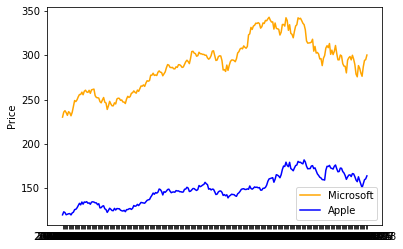

<Figure size 1440x360 with 0 Axes>

In [93]:
#Code for plot here.
plt.plot(msft['Date'], msft['Close'], label='Microsoft', color = 'orange')
plt.plot(aapl['Date'], aapl['Close'], label='Apple', color = 'blue')
plt.ylabel('Price')
plt.legend(loc='lower right')
plt.figure(figsize=(20,5));

C) Which company seems to be doing better?  Why?

<span style="color:red">*Both stocks seem to be doing roughly the samae in terms of performance, which is likely due to the fact that they are both massive tech companies and what affects one strongly affects the other.*</span>

---

### **Question 11.** 

Find the rolling averages of both company's closing stock values over the last year.  Create a line graph of these rolling averges.  Do not include the actual closing price of the stocks on your graph, but just the rolling average of the closing stock values.

As before, be sure to:
    
* Label your axes and give a title
* Make the figure size wide
* include a legend

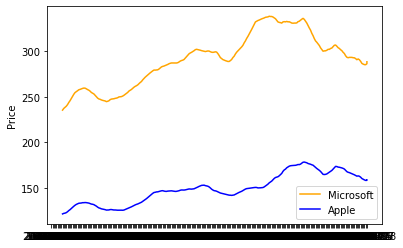

<Figure size 1440x360 with 0 Axes>

In [92]:
#Code here
msft['Rolling Average'] = msft['Close'].rolling(10).mean()
aapl['Rolling Average'] = aapl['Close'].rolling(10).mean()
plt.plot(msft['Date'], msft['Rolling Average'], label='Microsoft', color = 'orange')
plt.plot(aapl['Date'], aapl['Rolling Average'], label='Apple', color = 'blue')
plt.ylabel('Price')
plt.legend(loc='lower right')
plt.figure(figsize=(20,5));

---

### Note: Crazy back and forth line graphs are not helpful.

Sometimes, students give me crazy lie graphs on their projects, so let's prevent that problem with this example.

NOTE: 

* If you have 2 data points with the same x value, then a line graph would not be appropriate, unless you were drawing a different line through each.  

Run the code below to see what I mean.  Notice the line plot is busy and the lines don't provide any trend information.

Text(0.5, 1.0, 'This scatterplot on the same dataset is okay though.')

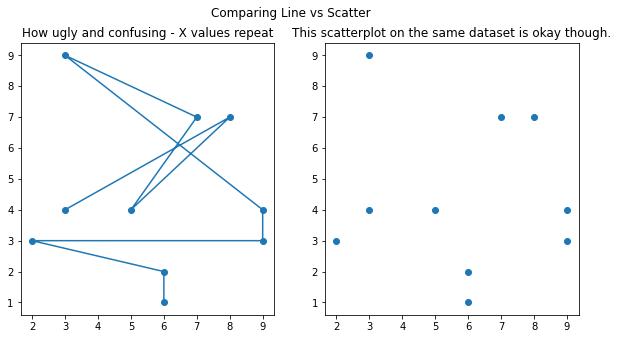

In [94]:
#Run to see an example

#Making up data
table = pd.DataFrame()
table["X"] = np.array([3, 8, 5, 7, 3, 9, 9, 2, 6, 6]) 
table["Y"] = np.array([4, 7, 4, 7, 9, 4, 3, 3, 2, 1])
table

#Getting ready to plot two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Comparing Line vs Scatter')

#Plotting left plot
ax1.plot(table["X"], table["Y"], marker = 'o')
ax1.set_title("How ugly and confusing - X values repeat")

#Plotting right plot
ax2.scatter(table["X"], table["Y"])
ax2.set_title("This scatterplot on the same dataset is okay though.")

Hopefully you agree that the left plot is just busy and not something we can learn from.


## ASK GOOD QUESTIONS

We can use scatterplots and line graphs to ask good questions:

* Scatterplots are one good way to start assesing questions like **"Is there a relationship between X and Y?"**  

* Related to the previous bullet point, correlation coefficients specifically help us determine: **"Is there a correlation (so a linear relationship) between X and Y?"**

* On the other hand, **a line graph shows the nature of a relationship, not whether there is a relationship or not between two sets of data**. For example, they can be used to instantly see the ‘journey’ made by a variable over time or by a variable as the other is changing.

Let's apply these ideas to the Employee data.

## A blast from the past: EMPLOYEE DATA

Recall the dataset you looked at in which the company that generated the dataset was trying to understand employee satisfcation and retention.  

Import it by running the cell below.  Here 's an xplanation of variables/headers:

* **employee_id**                  
* **satisfaction_level**:                       A score rating how satisfied the employee was with the company (scale 0-1)        
* **last_evaluation_score**:               A score from 0-1 rating the person's performance
* **number_of_projects**:                 Number of projects the person was assigned to        
* **average_monthly_hours**:          The average hours the person worked per month        
* **years_spent_at_company**:        
* **work_accident**:                           
    * 0: No accident   
    * 1: The person was in an accident
* **left_company**                              
    * 0: Did not leave company    
    * 1: Did leave company        
* **promotion_in_last_5years**       
    * 0: Not promoted over last 5 years   
    * 1: Was promoted
* **department**       
* **salary:**                                          high medium or low based on the groups in salary_range
* **salary_range:**                              
    * less than 45,000
    * 45000-74999 
    * 75000 or more

In [95]:
emp_data = pd.read_csv("employee_satisfaction.csv")
emp_data

,employee_id,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_at_company,work_accident,left_company,promotion_in_last_5years,department,salary,salary_range
0,1,0.38,0.53,2,157,3,0,1,0,sales,low,"Less than $45,000"
1,2,0.80,0.86,5,262,6,0,1,0,sales,medium,"$45,000 - $74,999"
2,3,0.11,0.88,7,272,4,0,1,0,sales,medium,"$45,000 - $74,999"
3,4,0.72,0.87,5,223,5,0,1,0,sales,low,"Less than $45,000"
4,5,0.37,0.52,2,159,3,0,1,0,sales,low,"Less than $45,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,0.37,0.48,2,160,3,0,1,0,support,low,"Less than $45,000"
14996,14997,0.37,0.53,2,143,3,0,1,0,support,low,"Less than $45,000"
14997,14998,0.11,0.96,6,280,4,0,1,0,support,low,"Less than $45,000"
14998,14999,0.37,0.52,2,158,3,0,1,0,support,low,"Less than $45,000"


---

### **Question 12.** 


What are the different departments in this data set?  

Answer this question by using a function you learned - you should get a list of each department where each department is included exactly once.

In [99]:
#code
departments = emp_data['department'].unique()
departments

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

---

### **Question 13.** 


Pick a department that interests you.  Use a scatterplot/correlation coefficient or a line graph to help you answer one of the questions below for your department.  

**BE SURE TO EXPLAIN WHAT YOU'VE FOUND.**

**TAKE NOTE:**

* Feel free to create another ipynb to do your exploration for this question and the future questions if you are really interested in the dataset and you want to explore it in depth, but please note that is not necessary for this HW question.

* You can just show one graph/explanation to get full credit, but please don't show more than 3 here.

* Having said that, if you do screw around and find lots of cool things, please let me know by aubmitting your second ipynb and emailing me to let me know you've submitted 2.  (Again, this is not necessary but I know some of you like doing this.)

**QUESTIONS TO CHOSE FROM - NOTE:  NOT ALL OF THESE ARE GOOD OPTIONS FOR SCATTER PLOTS/LINE PLOTS.  I AM TESTING TO SEE IF YOU CAN DECIDE THAT ON YOUR OWN.**

 
a) Is there a relationship between years spent at the company and the number of projects a person works on?

b) Is there a relationship between years spent at the company and satisfaction level?

c) Does a higher salary level indicate a higher employee satisfaction average?

d) Do the number of weekly hours and departmenet of the employee have a relationship?

e) Does the satisfication level of the employee correlate with their evaluation score?

f) Is there a relation betweent the amount of years spent at the company and their evaluated preformance rating? 

g) Is a relationship between the number project an employee does and the number of monthly hours worked

h) Is there a relationship between the number of years spent at the company and the employees who were promoted?

i) When compared to those with lower salaries, do highly payed employees work more hours?

j) Do the number of projects correlation with the evaluation score of the employee?

k) Is there an even mix of employees from each department?

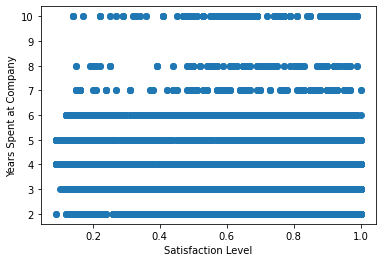

In [114]:
#Code here
#Is there a correlation between years spent at the company and satisfaction level?
#Feel free to add more code cells!
plt.scatter(emp_data['satisfaction_level'], emp_data['years_spent_at_company'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Years Spent at Company');

<span style="color:red">*For the first few years, satisfaction levels appear to be solid across the board until around year 7, when satisfaction overall begins to lean more towards a higher rating. This could be due to a number of reasons, perhaps several dissatisfied employees begin to drop off between year 6 and 7, or perhaps there are standard promotions within the company around that time frame that causes employees to be more satisfied.*</span>

---

### **Question 14.** 


Pick a second department that interests you.  Use a scatterplot/correlation coefficient or a line graph to answer the same question for that department.

**BE SURE TO EXPLAIN WHAT YOU'VE FOUND.**

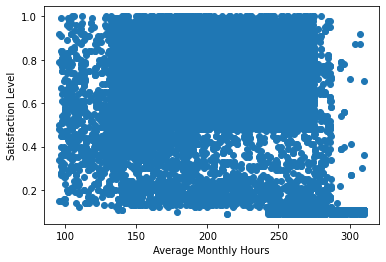

In [113]:
#Code here
#Is there a correlation between average monthly hours and satisfaction level?
#Feel free to add more code cells!
plt.scatter(emp_data['average_monthly_hours'], emp_data['satisfaction_level'])
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level');

<span style="color:red">*There doesn't appear to be much of a correlation due to the closeness of the points, but there are a few points to be taken. Clearly, there is a drop off in satisfaction in the range between 275 and 300 monthly hours, showing that overworking is likely causing significant dissatisfaction for those employees. The next is a very solid chunk of employees working between 125 and 275 hours a month that have a decently high satisfaction level (above .5) which could indicate that this is the working hours that the company might want to target to increase satisfaction.*</span>

---

### **Question 15.** 


A) Here's one relationship I found.  Check out the graphs below.  Explain what we learn from these graphs.

![image](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/Hw4_EmpSatisfaction.PNG)

<span style="color:red">*Image is not showing up for me!!!*</span>

B) Write code to generate the above graphs from the `emp_data` table.  You can do this by making side-by-side graphs if you want to experiment, or feel free to create each graph in its own code cell.

In [25]:
#code for plot here.  Add more cells if needed!

C) Find the correlation coefficient of the satisfaction levels versus the average monthly hours worked for EACH of the 2 groups above and verify they are both close to 0.  Based on the plots above, does this suggest there is no relationship between the variables?  Explain. 

In [26]:
#You may need more code above here

#But set these variables at the end
emp_data_stayed_corr = ...
emp_data_left_corr = ...
emp_data_stayed_corr, emp_data_left_corr  #Should print out the correlations! 

(Ellipsis, Ellipsis)

<span style="color:red">*Write your explanation here.*</span>

---

You're done!  Submit!